# TASK-2: Unemployment Analysis with Python.
## ● Analyze unemployment rate data representing unemployed people percentage.
## ● Use Python for data cleaning, exploration, and visualization of unemployment trends.
## ● Investigate the impact of Covid-19 on unemployment rates.
## ● Identify key patterns or seasonal trends in the data.
## ● Present insights that could inform economic or social policies.

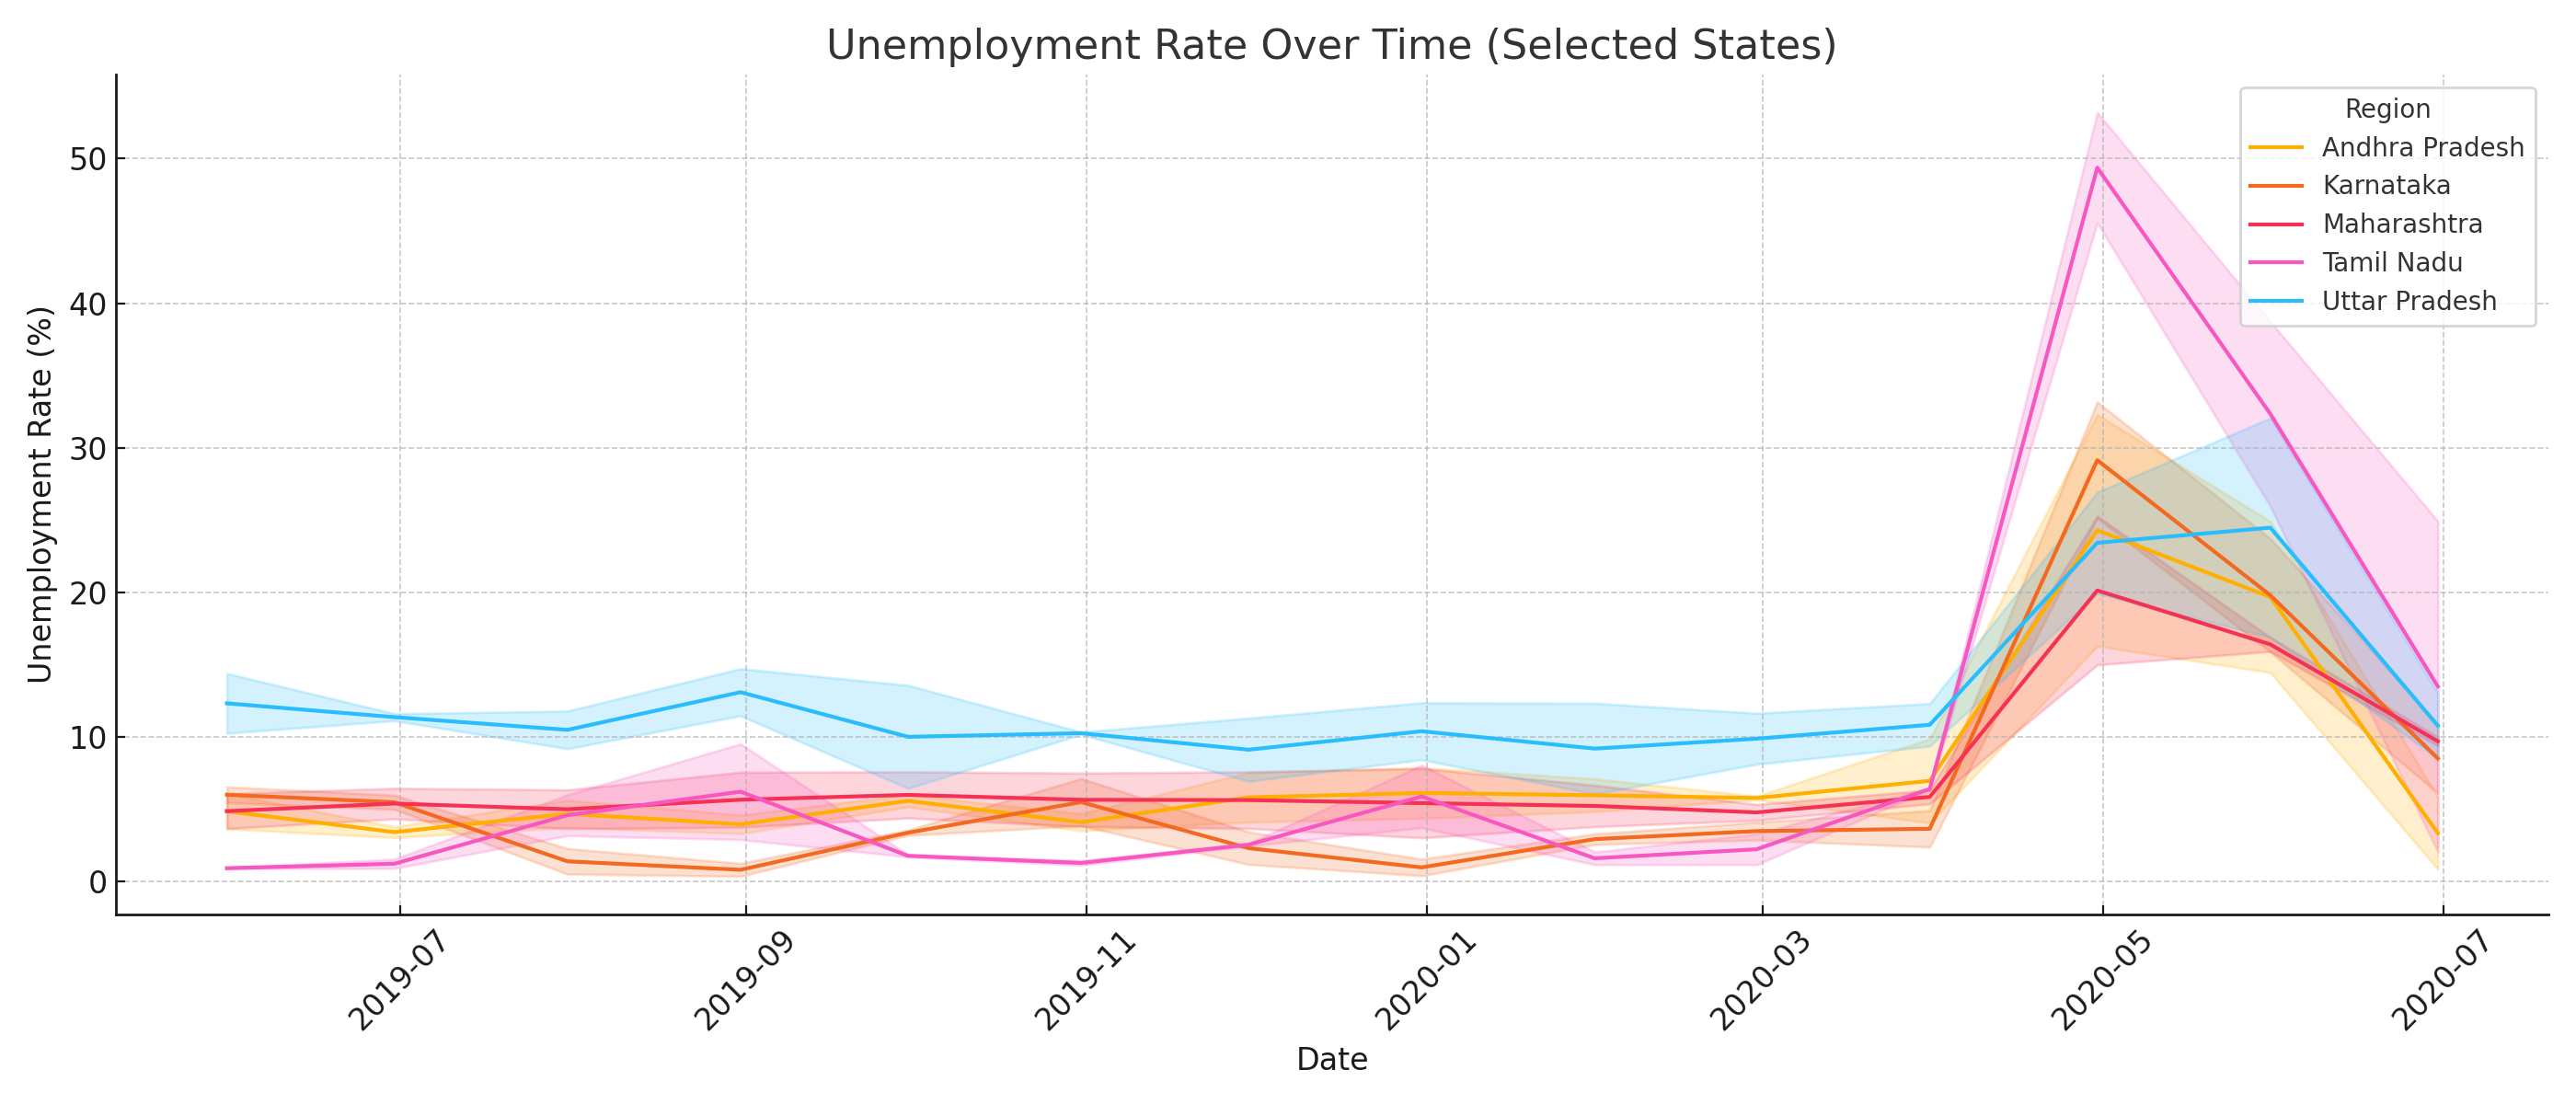

In [82]:
# Displaying the example image:
from IPython.display import Image
Image(filename="C:/Users/Majji/Downloads/unemployment_rate_plot.png")

# Importing the Libraries:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from difflib import get_close_matches

# Loading the DataSet-File:

In [84]:
# Load CSV files (adjust paths if needed)
df1 = pd.read_csv("Unemployment-1.csv")
df2 = pd.read_csv("Unemployment-2.csv")

# Display the (Both) Datasets:

In [85]:
# Display the first few rows
print("Dataset 1: Unemployment-1.csv")
display(df1.head())

print("Dataset 2: Unemployment-2.csv")
display(df2.head())

Dataset 1: Unemployment-1.csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Dataset 2: Unemployment-2.csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Clean up whitespace:

In [86]:
# Clean up whitespace in column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert 'Date' to datetime:

In [87]:
# Convert 'Date' to datetime safely
df1['Date'] = pd.to_datetime(df1['Date'].astype(str).str.strip(), format='%d-%m-%Y', errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'].astype(str).str.strip(), format='%d-%m-%Y', errors='coerce')

# Print Datatypes:

In [88]:
print(df1.dtypes) 
print(df2.dtypes)

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object
Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object


# Combine the Datasets:

In [89]:
# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# View combined structure:

In [90]:
print("Combined DataFrame columns:", df.columns.tolist())
print("Unique regions/states:", df['Region'].unique() if 'Region' in df.columns else df.columns)

Combined DataFrame columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area', 'Region.1', 'longitude', 'latitude']
Unique regions/states: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']


# Rename columns for consistency:

In [91]:
df1.rename(columns={'Region': 'State', 'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2.rename(columns={'Region': 'State', 'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

# Check for missing values:

In [92]:
print("Missing Values in Dataset 1:\n", df1.isnull().sum())
print("\nMissing Values in Dataset 2:\n", df2.isnull().sum())

Missing Values in Dataset 1:
 State                                      28
Date                                       28
Frequency                                  28
Unemployment Rate                          28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Missing Values in Dataset 2:
 State                                      0
Date                                       0
Frequency                                  0
Unemployment Rate                          0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


# Showing Visualization of DataSets:

# Combine & Explore Datasets to analyze full trends:

In [93]:
combined_df = pd.concat([df1[['Date', 'State', 'Unemployment Rate']],
                         df2[['Date', 'State', 'Unemployment Rate']]])

# National Monthly Average:

In [94]:
monthly_avg = combined_df.groupby('Date')['Unemployment Rate'].mean().reset_index()

# Plotting national unemployment trend:

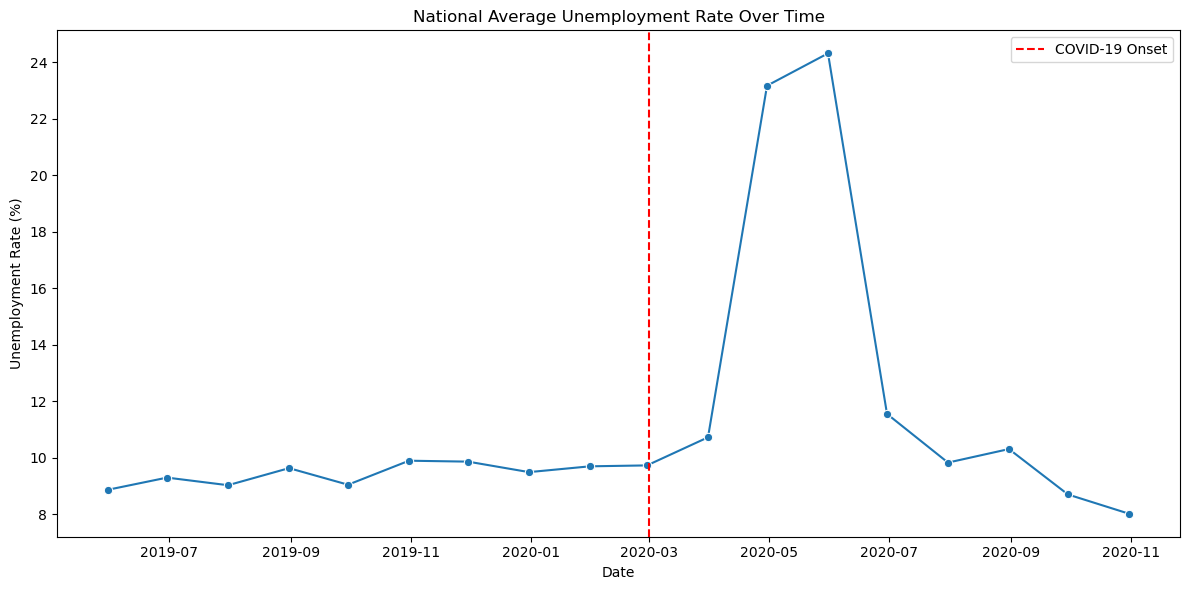

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment Rate', data=monthly_avg, marker='o')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Onset')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# State-wise Comparison:

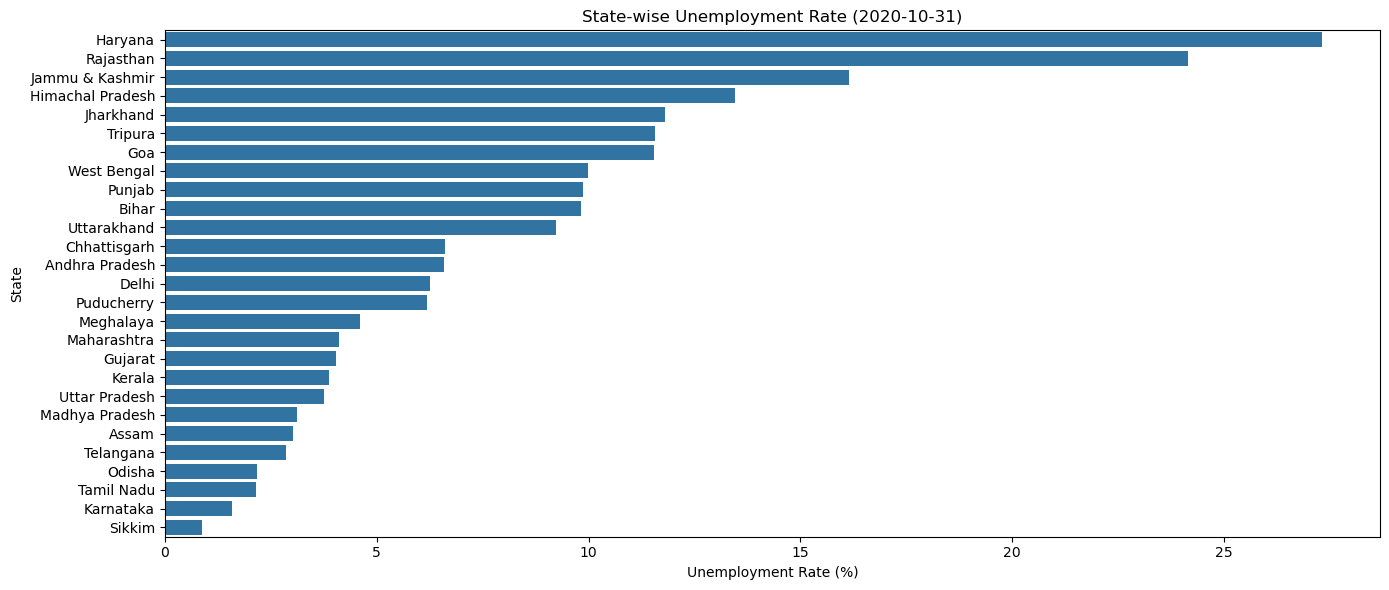

In [96]:
latest_data = combined_df[combined_df['Date'] == combined_df['Date'].max()]

plt.figure(figsize=(14, 6))
sns.barplot(y='State', x='Unemployment Rate', data=latest_data.sort_values(by='Unemployment Rate', ascending=False))
plt.title(f'State-wise Unemployment Rate ({combined_df["Date"].max().date()})')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Seasonal Trend Analysis:

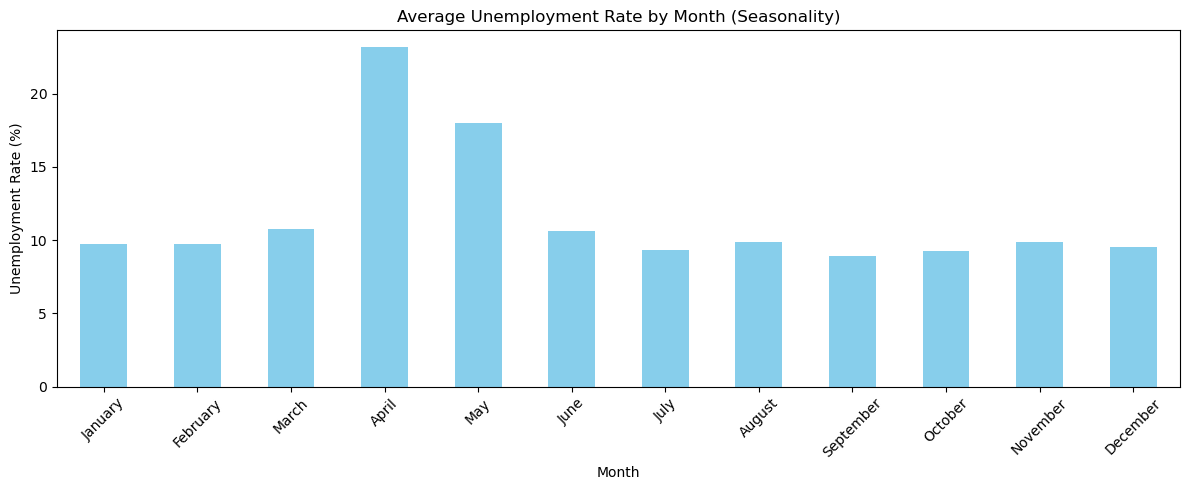

In [97]:
# Extract month and year
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month_name()

# Monthly seasonality
monthly_season = combined_df.groupby('Month')['Unemployment Rate'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 5))
monthly_season.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Month (Seasonality)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# COVID-19 Impact Analysis:

In [98]:
# Compare before and after March 2020
pre_covid = combined_df[combined_df['Date'] < '2020-03-01']
post_covid = combined_df[combined_df['Date'] >= '2020-03-01']

pre_avg = pre_covid['Unemployment Rate'].mean()
post_avg = post_covid['Unemployment Rate'].mean()

print(f"Average Unemployment Rate Before COVID-19: {pre_avg:.2f}%")
print(f"Average Unemployment Rate After COVID-19: {post_avg:.2f}%")

Average Unemployment Rate Before COVID-19: 9.48%
Average Unemployment Rate After COVID-19: 15.31%


# Again Loading the Datasets:

In [99]:
# Load CSV files (adjust paths if needed)
df1 = pd.read_csv("Unemployment-1.csv")
df2 = pd.read_csv("Unemployment-2.csv")
print("Dataset 1: Unemployment-1.csv")
display(df1.head())
print("Dataset 2: Unemployment-2.csv")
display(df2.head())

Dataset 1: Unemployment-1.csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Dataset 2: Unemployment-2.csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Print Both Datasets columns:

In [100]:
print(df1.columns)
print(df2.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [101]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Assuming df1 is already defined:

In [102]:
df1["Date"] = pd.to_datetime(df1["Date"].astype(str).str.strip(), format='%d-%m-%Y', errors='coerce')

print(df1.dtypes)  # To confirm 'Date' is now datetime64

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object


# Assuming df2 is already defined:

In [103]:
df2["Date"] = pd.to_datetime(df2["Date"].astype(str).str.strip(), format='%d-%m-%Y', errors='coerce')

print(df2.dtypes)  # To confirm 'Date' is now datetime64

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object


# Rename columns for consistency:

In [104]:
df1.rename(columns={'Region': 'State', 'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2.rename(columns={'Region': 'State', 'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

# Check for missing values:

In [105]:
print("Missing Values in Dataset 1:\n", df1.isnull().sum())
print("\nMissing Values in Dataset 2:\n", df2.isnull().sum())

Missing Values in Dataset 1:
 State                                      28
Date                                       28
Frequency                                  28
Unemployment Rate                          28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Missing Values in Dataset 2:
 State                                      0
Date                                       0
Frequency                                  0
Unemployment Rate                          0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


# Combine datasets:

In [106]:
df = pd.concat([df1, df2], ignore_index=True)

In [107]:
# Clean column names
df.columns = df.columns.str.strip()

# Show all column names:

In [108]:
print("\n🧾 All Columns:")
print(df.columns.tolist())


🧾 All Columns:
['State', 'Date', 'Frequency', 'Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area', 'Region.1', 'longitude', 'latitude']


# Auto-match expected columns:

In [110]:
expected_cols = {
    'Estimated Unemployment Rate (%)': '',
    'Estimated Employed': '',
    'Estimated Labour Participation Rate (%)': '',
    'Region': '',
    'Date': ''
}

print("\nClosest matches for required columns:")
for col in expected_cols.keys():
    match = get_close_matches(col, df.columns, n=1)
    if match:
        expected_cols[col] = match[0]
        print(f"- {col} ➜ {match[0]}")
    else:
        print(f"'{col}' not found in DataFrame columns.")



Closest matches for required columns:
- Estimated Unemployment Rate (%) ➜ Unemployment Rate
- Estimated Employed ➜ Estimated Employed
- Estimated Labour Participation Rate (%) ➜ Estimated Labour Participation Rate (%)
- Region ➜ Region.1
- Date ➜ Date


# Representing the Visualization of Given DataSets:

# Correlation Heatmap:

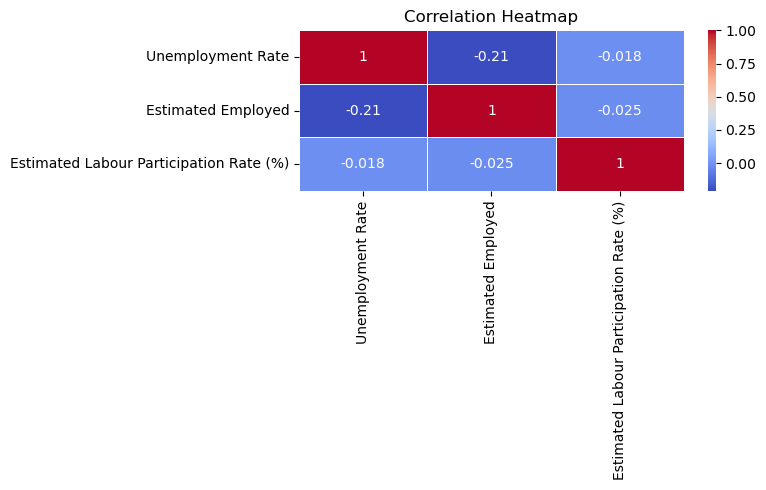

In [111]:
plt.figure(figsize=(8, 5))
corr = df[[expected_cols['Estimated Unemployment Rate (%)'],
           expected_cols['Estimated Employed'],
           expected_cols['Estimated Labour Participation Rate (%)']]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Pairplot:

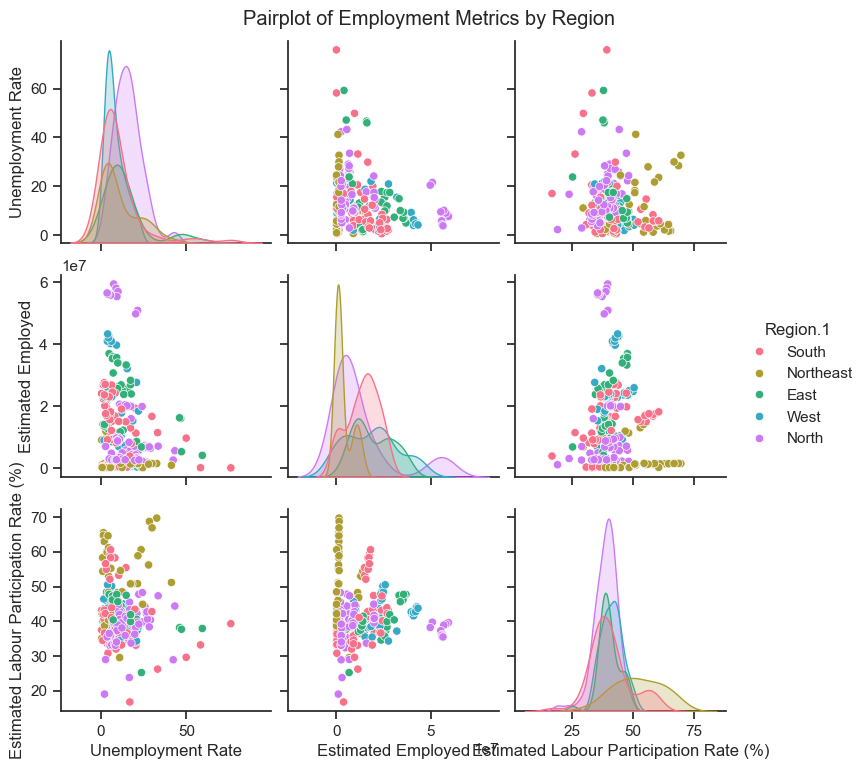

In [112]:
sns.set(style="ticks")
sns.pairplot(df,
             vars=[expected_cols['Estimated Unemployment Rate (%)'],
                   expected_cols['Estimated Employed'],
                   expected_cols['Estimated Labour Participation Rate (%)']],
             hue=expected_cols['Region'],
             palette="husl",
             diag_kind="kde",
             markers="o")
plt.suptitle("Pairplot of Employment Metrics by Region", y=1.02)
plt.show()

# Bar Chart - Average Unemployment Rate by Region:

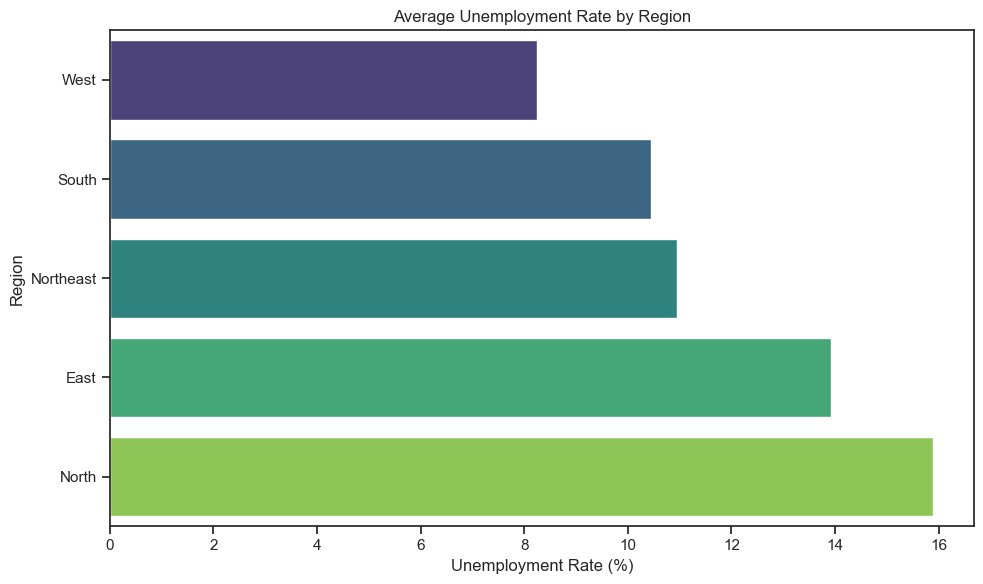

In [113]:
plt.figure(figsize=(10, 6))
avg_unemp = df.groupby(expected_cols['Region'])[expected_cols['Estimated Unemployment Rate (%)']].mean().sort_values()

# Assign hue to avoid the FutureWarning
sns.barplot(x=avg_unemp.values,
            y=avg_unemp.index,
            hue=avg_unemp.index,
            palette="viridis",
            legend=False)

plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# Box Plot - Unemployment Rate Distribution by Region:

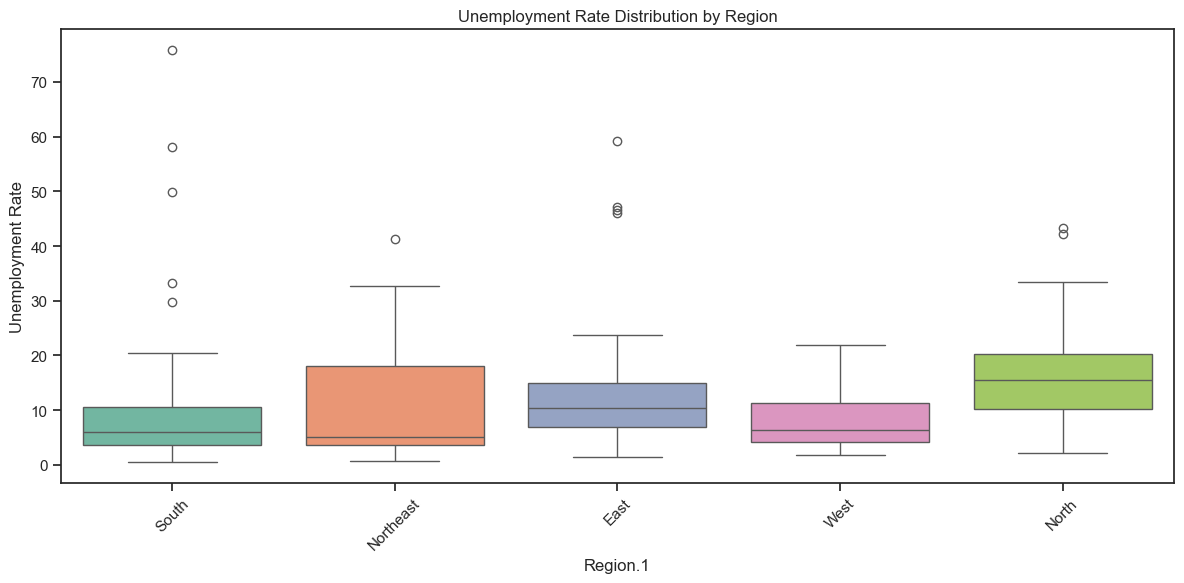

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=expected_cols['Region'],
            y=expected_cols['Estimated Unemployment Rate (%)'],
            hue=expected_cols['Region'],
            data=df,
            palette='Set2',
            legend=False)

plt.title("Unemployment Rate Distribution by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Plot - Unemployment Rate Over Time:

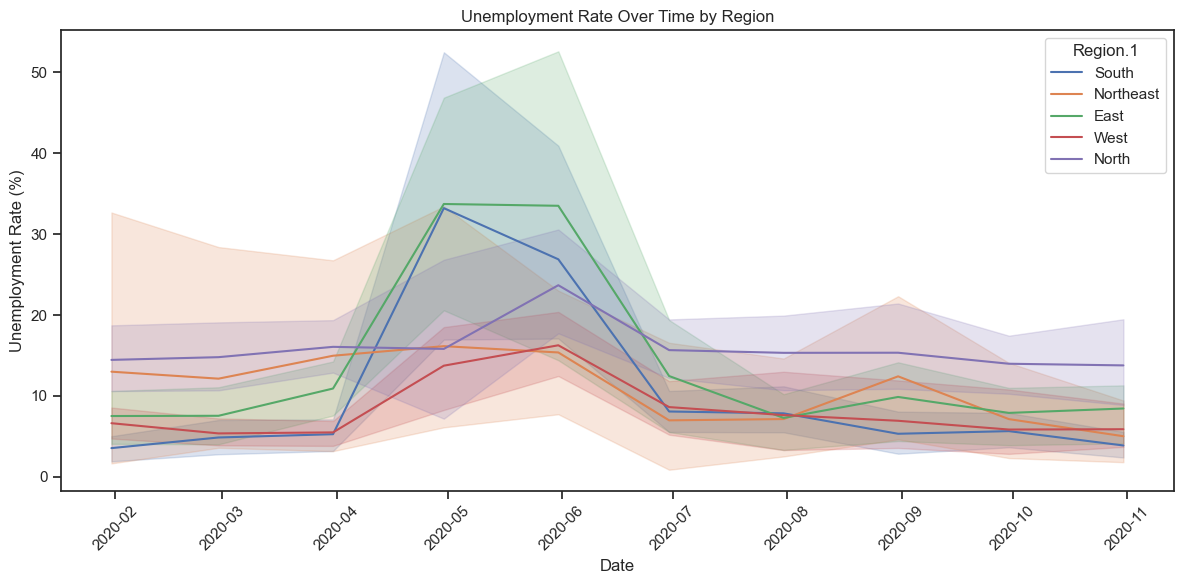

In [115]:
df[expected_cols['Date']] = pd.to_datetime(df[expected_cols['Date']])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=expected_cols['Date'], y=expected_cols['Estimated Unemployment Rate (%)'], hue=expected_cols['Region'])
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()